# Social Network Analytics Project
### Analysis of Inter-community football Conflcits in subreddit

#### Team Members :
##### Dinesh Sathyanarayanan (01FB16ECS114)
##### Deekshith G (01FB16ECS106)
##### Aswath S (01FB16ECS080)

In [1]:
"""
COMMON USERS VISUALIZATION - ANALYSIS FOR 2017 DATA (CSV FORMAT DATA)
This file contains graph construction of number of common users between subreddits\
Only one month graph is shown (Jan)
Analysis can be done with all 12 months to see how many users have dropped or caused more activity in a new community
"""

import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
NO_OF_MONTHS = 12

In [10]:
folder = "./monthly_data/"
files = os.listdir(folder)

In [11]:
df_list = []

In [12]:
csv_files = [file for file in files if "~lock" not in file]

In [13]:
csv_files

['RC_2017-01-GroupPost.csv',
 'RC_2017-02-GroupPost.csv',
 'RC_2017-03-GroupPost.csv',
 'RC_2017-04-GroupPost.csv',
 'RC_2017-05-GroupPost.csv',
 'RC_2017-06-GroupPost.csv',
 'RC_2017-07-GroupPost.csv',
 'RC_2017-08-GroupPost.csv',
 'RC_2017-09-GroupPost.csv',
 'RC_2017-10-GroupPost.csv',
 'RC_2017-11-GroupPost.csv',
 'RC_2017-12-GroupPost.csv']

In [14]:
for file in csv_files:
    print(file)
    df = pd.read_csv(folder+file)
    df_list.append(df)

RC_2017-01-GroupPost.csv


C:\Users\Dinesh\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


RC_2017-02-GroupPost.csv
RC_2017-03-GroupPost.csv
RC_2017-04-GroupPost.csv


C:\Users\Dinesh\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


RC_2017-05-GroupPost.csv
RC_2017-06-GroupPost.csv


C:\Users\Dinesh\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


RC_2017-07-GroupPost.csv


C:\Users\Dinesh\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,5,10,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


RC_2017-08-GroupPost.csv


C:\Users\Dinesh\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


RC_2017-09-GroupPost.csv
RC_2017-10-GroupPost.csv
RC_2017-11-GroupPost.csv


C:\Users\Dinesh\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


RC_2017-12-GroupPost.csv


In [8]:
df_month = df_list[0].drop(['Unnamed: 0'], axis=1)

In [25]:
count = 0
counts = {}
author_set = {}
author_list = []
community_list = df_month["subreddit"].unique()

In [26]:
for community in community_list:
    df_sub = df_month[df_month["subreddit"] == community]
    counts[community] = set()
    author_set[community] = set(df_sub["author"].unique())
    author_list.extend(df_sub["author"])

In [45]:
table=[]
for community1 in community_list:
    count_matrix = []
    for community2 in community_list:
        if(community1==community2):
            count_matrix.append(0)
        else:
            count_matrix.append(len(author_set[community1]&author_set[community2]))
    table.append(count_matrix)

In [46]:
df3 = pd.DataFrame(table, index = community_list,columns = community_list)

### Count of users commenting in multiple communities

##### Indicates probability of multiple social / anti-social homes for one user

In [47]:
df3

,soccer,Gunners,reddevils,LiverpoolFC,chelseafc,coys,Barca,realmadrid,MCFC,fcbayern,...,Hammers,avfc,CelticFC,SaintsFC,ASRoma,benfica,psg,lcfc,atletico,FCInterMilan
soccer,0,2646,3234,2362,1443,1215,690,518,575,199,...,276,114,57,155,53,76,58,55,46,72
Gunners,2646,0,146,86,91,48,34,23,47,17,...,18,8,6,8,6,4,8,4,6,4
reddevils,3234,146,0,164,82,54,28,30,77,8,...,19,6,6,1,4,5,7,5,3,4
LiverpoolFC,2362,86,164,0,61,39,28,11,40,12,...,10,6,6,8,3,4,4,5,4,5
chelseafc,1443,91,82,61,0,46,19,15,45,9,...,10,7,3,3,4,2,2,1,3,4
coys,1215,48,54,39,46,0,18,15,41,8,...,9,5,4,5,6,3,2,3,5,2
Barca,690,34,28,28,19,18,0,76,23,8,...,9,3,2,1,2,4,3,1,5,2
realmadrid,518,23,30,11,15,15,76,0,14,9,...,3,2,2,1,2,2,2,0,3,4
MCFC,575,47,77,40,45,41,23,14,0,13,...,10,2,1,0,4,2,1,2,3,0
fcbayern,199,17,8,12,9,8,8,9,13,0,...,4,2,2,1,1,2,2,0,2,2


In [56]:
graph = nx.Graph()

In [57]:
graph.add_nodes_from(community_list)

In [58]:
for comm1 in community_list:
    for comm2 in community_list:
        graph.add_edge(comm1, comm2, weight = df3[comm1][comm2])        

In [146]:
# Initialize graph
edge_list = [(u, v) for (u, v, d) in graph.edges(data=True)]
pos = nx.spring_layout(graph, k=2,iterations=50)  # positions for all nodes
weights = [graph[u][v]['weight'] for u,v in graph.edges()]

In [154]:
weights_norm = [weight*100/sum(weights) for weight in weights]

In [155]:
weights_norm

[0.0,
 15.50632911392405,
 18.952180028129394,
 13.842006563525551,
 8.456399437412095,
 7.120253164556962,
 4.043600562587905,
 3.035630567276137,
 3.3696671354899204,
 1.1661978434130333,
 1.3478668541959682,
 1.4416315049226442,
 1.1896390060947022,
 1.4709329582747304,
 1.6174402250351618,
 0.6680731364275668,
 0.3340365682137834,
 0.9083450539146741,
 0.3105954055321144,
 0.4453820909517112,
 0.3398968588842007,
 0.3223159868729489,
 0.26957337083919364,
 0.4219409282700422,
 0.0,
 0.8556024378809189,
 0.5039849976558838,
 0.53328645100797,
 0.2812939521800281,
 0.1992498827941866,
 0.13478668541959682,
 0.27543366150961085,
 0.0996249413970933,
 0.1113455227379278,
 0.04688232536333802,
 0.04102203469292077,
 0.1113455227379278,
 0.10548523206751055,
 0.04688232536333802,
 0.035161744022503515,
 0.04688232536333802,
 0.035161744022503515,
 0.02344116268166901,
 0.04688232536333802,
 0.02344116268166901,
 0.035161744022503515,
 0.02344116268166901,
 0.0,
 0.9610876699484294,
 0.48

##### No. of unique users commenting across subreddits - shows potential of conflict

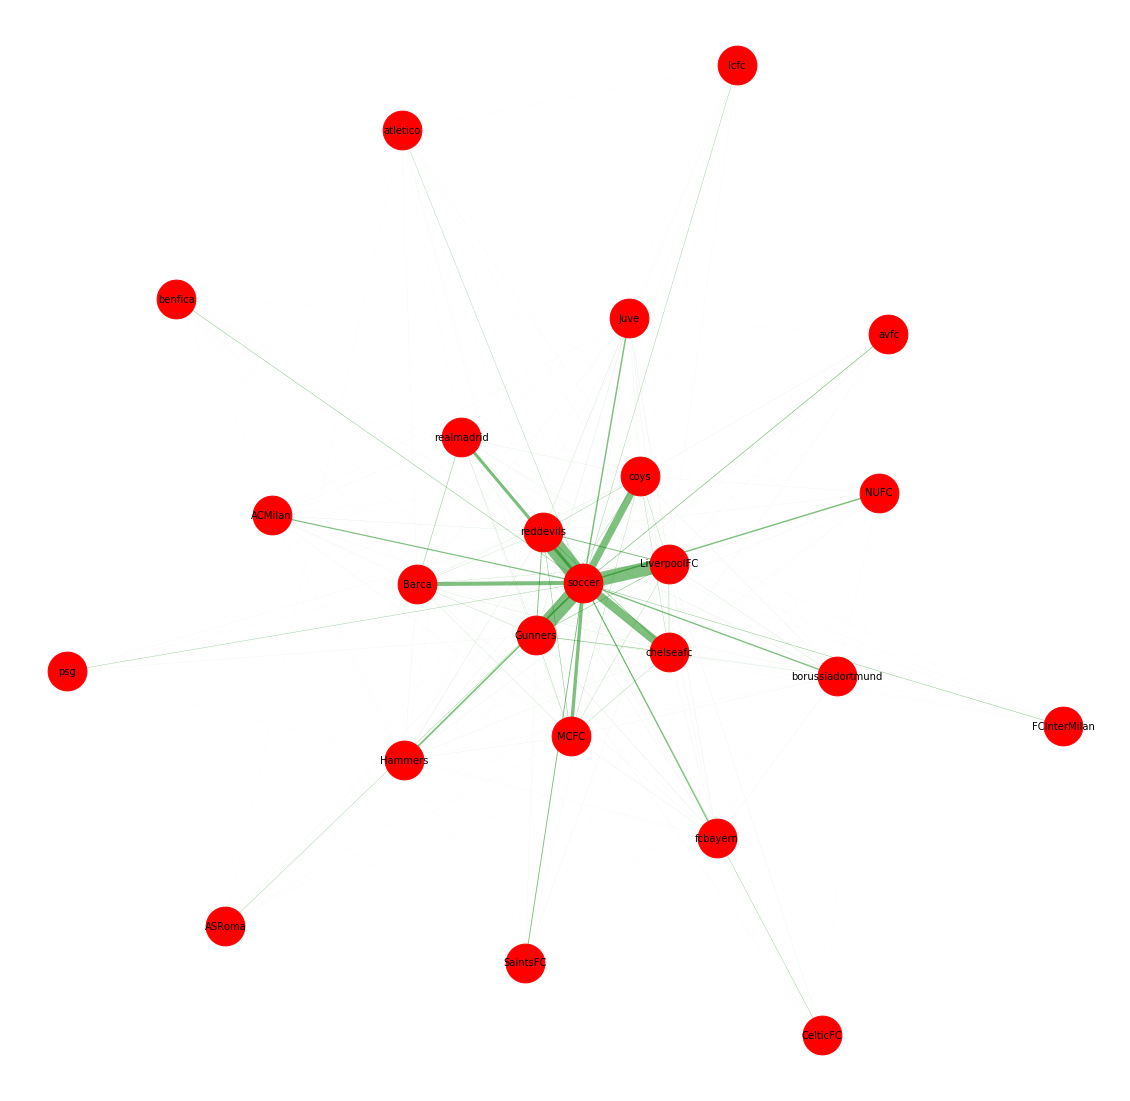

In [156]:
plt.figure(figsize=(20,20))
# nodes
nx.draw_networkx_nodes(graph, pos, node_size=1500, node_color = 'r')

# edges
nx.draw_networkx_edges(graph, pos, edgelist=edge_list,
                       width=weights_norm, alpha=0.5, edge_color='g')

# labels
nx.draw_networkx_labels(graph, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

In [2]:
# Inferences

# Soccer being the largest subreddit of them all, has the highest degree
# reddevils (Manchester United) and Gunners (Arsenal) have the highest weighted edges 
# Suggests more fans for those two communities
# All nodes have degree atleast 1
# This is because of the inclusion of soccer commmunity, which is much bigger and mor diverse than the other communities